## CS231n
### Neural Networks (1)

### Two-Layer NN Pipeline (CIFAR-10 example)

$\mathbf{x}\;(3072\times1)\;
\;\xrightarrow{\;\mathbf{W}_1\;}
\;\mathbf{h}=\mathbf{W}_1\mathbf{x}\;(100\times1)\;
\;\xrightarrow{\;\text{ReLU}\;}
\;\mathbf{a}=\max(0,\mathbf{h})\;(100\times1)\;
\;\xrightarrow{\;\mathbf{W}_2\;}
\;\mathbf{s}=\mathbf{W}_2\mathbf{a}\;(10\times1)
\;\longrightarrow\;\text{class scores}$

*Compact form:*  
$\boxed{\;\mathbf{s} \;=\; \mathbf{W}_2\,\max\!\bigl(0,\mathbf{W}_1\mathbf{x}\bigr)\;}$

| Matrix | Role | Shape |
|--------|------|-------|
| $\mathbf{W}_1$ | input → hidden | $100 \times 3072$ |
| $\mathbf{W}_2$ | hidden → scores | $10 \times 100$ |

*ReLU adds the non-linearity; without it, $\mathbf{W}_2\mathbf{W}_1$ collapses to one linear map.*

**Training:** learn $\mathbf{W}_1,\;\mathbf{W}_2$ with stochastic gradient descent (back-propagation supplies the gradients).

---

#### Deeper (3-layer) variant

$\displaystyle
\mathbf{s}
=\;
\mathbf{W}_3\,\max\!\bigl(0,\,
\mathbf{W}_2\,\max\!\bigl(0,\,\mathbf{W}_1\mathbf{x}\bigr)\bigr),
\qquad
\mathbf{W}_3\in\mathbb{R}^{10\times H_2}
$

Hidden widths ($100,\;H_2,\dots$) are **hyper-parameters** you choose.

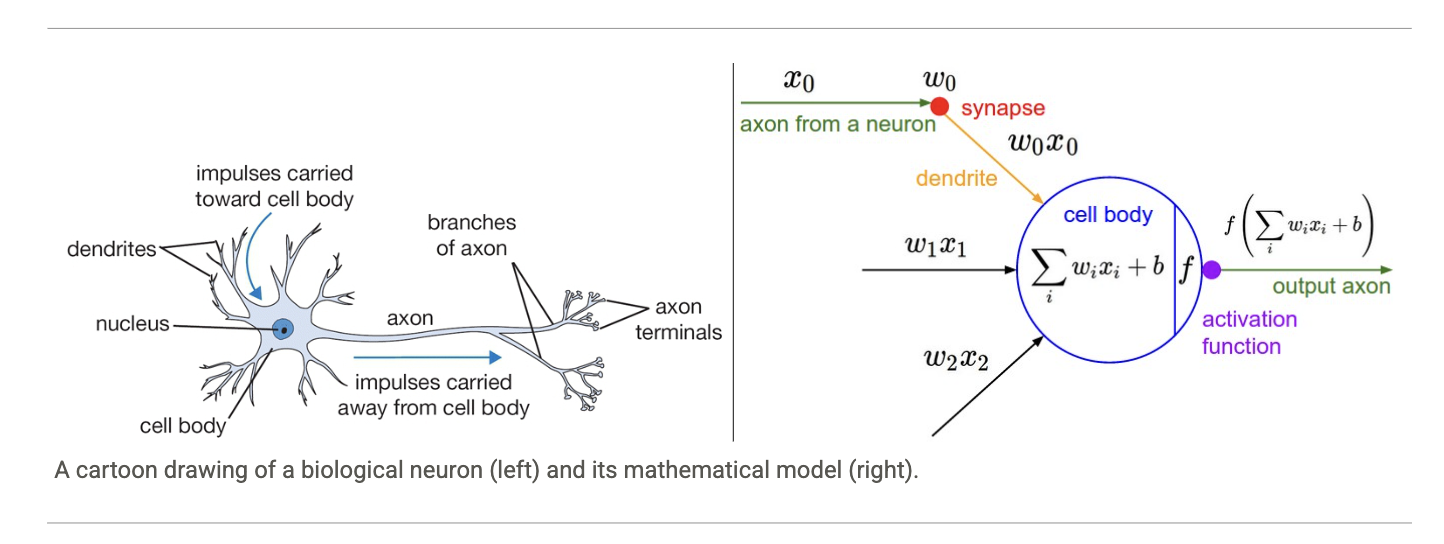
## Biological Motivation & Connections

- **Neuron & Synapse Counts**  
  - ≈ 86 billion neurons  
  - ≈ 10¹⁴–10¹⁵ synapses  

- **From Biology to Math**  
  1. **Inputs:** signals \(x_i\) arrive at dendrites  
  2. **Weights:** learnable \(w_i\) (excitatory if \(w_i>0\), inhibitory if \(w_i<0\))  
  3. **Weighted sum:**  
     $$
     z = \sum_i w_i\,x_i + b
     $$  
  4. **Activation (rate code):**  
     $$
     y = f(z)
     $$  
     - \(f\) maps real \(z\) → firing rate  
     - Common choice: sigmoid  
       $$
       \sigma(z) = \frac{1}{1 + e^{-z}}
       $$  

- **Why the nonlinearity?**  
  Without \(f\), the model collapses to a single linear map \(\sum_i w_i x_i\).  
  Activation “squashes” outputs and enables non-linear pattern learning.  

---

*Illustration: biological neuron (dendrites → cell body → axon) vs. artificial neuron computing*  
$$
y = f\!\bigl(\sum_i w_i x_i + b\bigr).
$$  

```python
# single neuron forward pass (sigmoid activation)
output = sigmoid(np.dot(weights, inputs) + bias)

## Single Neuron as a Binary Classifier

### 1. Sigmoid (Logistic) Activation  
- **Definition:**  
  $$\sigma(z) = \frac{1}{1 + e^{-z}}$$  
- **Role:**  
  - Converts \(z = \sum_i w_i x_i + b\) into the interval \([0,1]\) so it can be interpreted like a probability  
  - \(\sigma(z)\approx 1\) means “likes class 1,” \(\sigma(z)\approx 0\) means “dislikes class 1” (or “likes class 0”)

---

### 2. Binary Cross-Entropy Loss (Logistic Loss)  
- **Definition** (for a single sample):  
  $$
  \mathcal{L}_{\rm BCE}(y, \hat y)
    = -\bigl[y\log \hat y \;+\;(1-y)\log(1-\hat y)\bigr]
  $$  
  - \(y\in\{0,1\}\): true label  
  - \(\hat y = \sigma(z)\): predicted probability  
- **Interpretation:**  
  - Rewards high \(\hat y\) when \(y=1\) (low loss)  
  - Penalizes high \(\hat y\) when \(y=0\) (high loss)

---

### 3. Binary Softmax Classifier ≃ Logistic Regression  
- **Output interpretation:**  
  $$
  P(y=1\mid x) = \hat y = \sigma\bigl(\sum_i w_i x_i + b\bigr),\quad
  P(y=0\mid x) = 1 - \hat y
  $$  
- **Training objective:**  
  $$
  \min_{w,b}\;\sum_{n}\mathcal{L}_{\rm BCE}\bigl(y^{(n)},\sigma(z^{(n)})\bigr)
  $$  
  – optimized by gradient descent  
- **Prediction rule:**  
  \(\hat y > 0.5 \;\Rightarrow\) class 1, else class 0

---

### 4. Binary SVM Classifier (Hinge Loss)  
- **Hinge loss definition:**  
  $$
  \mathcal{L}_{\rm hinge}(y, z)
    = \max\{0,\,1 - y\,z\},\quad y\in\{-1,+1\},\;z=\sum_i w_i x_i + b
  $$  
- **Meaning:**  
  – Even if correctly classified (\(y\,z>0\)), if the margin \(y\,z<1\), you incur loss  
  – Encourages a large margin ⇒ equivalent to training a binary SVM

---

### 5. Regularization as “Gradual Forgetting”  
- **\(L_2\) regularization term:**  
  $$\mathcal{L}_{\rm reg} = \lambda \sum_i w_i^2$$  
- **Biological analogy:**  
  – Each update gently pulls synaptic weight \(w_i\) toward zero (“forgetting” old connections)  
  – Controls model complexity and prevents overfitting

---

### Full Pipeline Summary

1. **Forward pass:**  
   $$
   z = \sum_i w_i x_i + b,\quad \hat y = \sigma(z)
   $$
2. **Loss:**  
   - Logistic: \(\mathcal{L}_{\rm BCE}(y,\hat y)\)  
   - SVM: \(\mathcal{L}_{\rm hinge}(y,z)\)  
3. **(Optional) Regularization:**  
   $$
   +\;\lambda\|w\|_2^2
   $$
4. **Backward pass:**  
   – Compute \(\nabla_w,\nabla_b\) and update parameters via gradient descent

---

> **Conclusion:**  
> A single artificial neuron can implement classic binary classifiers:  
> - **Sigmoid + BCE** ⇒ Logistic Regression  
> - **Linear + Hinge** ⇒ Binary SVM  
> - **Regularization** ⇒ Biological “gradual forgetting”  
> all within the same framework.  

## Common Activation Functions & Their Pros/Cons

---

### 1. Sigmoid  
- **Definition:**  
  $$\sigma(x) = \frac{1}{1 + e^{-x}}$$  
- **Range:** \(0 \to 1\)  
- **Pros:**  
  - Historically motivated by neuron firing rates.  
- **Cons:**  
  1. **Saturation & vanishing gradients**  
     - For \(|x|\gg0\), \(\sigma(x)\to\{0,1\}\) and  
       $$\sigma'(x)=\sigma(x)\,(1-\sigma(x))\to0.$$  
     - Gradients “die” in these flat tails → deep nets learn very slowly.  
  2. **Not zero-centered**  
     - Outputs always positive ⇒ during backprop, weight updates all share the same sign → zig-zagging, slower convergence.

---

### 2. Tanh  
- **Definition:**  
  $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$  
- **Range:** \(-1 \to 1\)  
- **Pros:**  
  - Zero-centered outputs → less zig-zagging than sigmoid.  
- **Cons:**  
  - Still saturates for large \(|x|\) → vanishing gradient issues.

---

### 3. ReLU (Rectified Linear Unit)  
- **Definition:**  
  $$f(x) = \max(0,\,x)$$  
- **Range:** \([0, \infty)\)  
- **Pros:**  
  1. **Non-saturating for \(x>0\)** → no gradient vanishing in positive regime → faster convergence (e.g. 6× speedup vs. tanh).  
  2. **Computationally cheap** (simple threshold).  
- **Cons:**  
  1. **“Dead ReLU” problem**  
     - If a neuron’s input \(x\le0\) forever, output = 0 and gradient = 0 → neuron never recovers (“dies”).  
  2. **Not zero-centered** (outputs ≥0).

---

### 4. Leaky ReLU  
- **Definition:**  
  $$f(x) = \begin{cases}
    x, & x\ge0;\\
    \alpha x, & x<0,\;(\alpha\ll1)
  \end{cases}$$  
- **Pros:**  
  - Small negative slope (\(\alpha\)) keeps gradient flowing for \(x<0\) → mitigates dead ReLUs.  
- **Cons:**  
  - Introduces a new hyperparameter \(\alpha\).

---

### 5. Maxout  
- **Definition:**  
  $$
  \mathrm{Maxout}(x) = \max\bigl(w_1^\top x + b_1,\;w_2^\top x + b_2\bigr)
  $$  
- **Notes:**  
  - Learns piecewise-linear nonlinearities by selecting the largest of multiple affine scores.  
  - **ReLU** is a special case: \(\max(w^\top x + b,\,0)\).  
- **Pros:**  
  - No saturation, no dead units, extremely flexible.  
- **Cons:**  
  - Parameter count multiplies (×2 per unit), higher compute & memory cost.

---

## Activation Recommendation (TLDR)

1. **Default → ReLU**  
   - Simple, fast, widely used.  
   - Monitor “dead” units; avoid too-high learning rates.

2. **If many dead units →**  
   - **Leaky ReLU** (keep small gradient when \(x<0\))  
   - **Maxout** (learned, non-saturating nonlinearities)

3. **Avoid unless necessary →**  
   - **Sigmoid** (vanishing gradients, non zero-centered)  
   - **Tanh** (better than sigmoid but still saturates)

# Example feed-forward computation
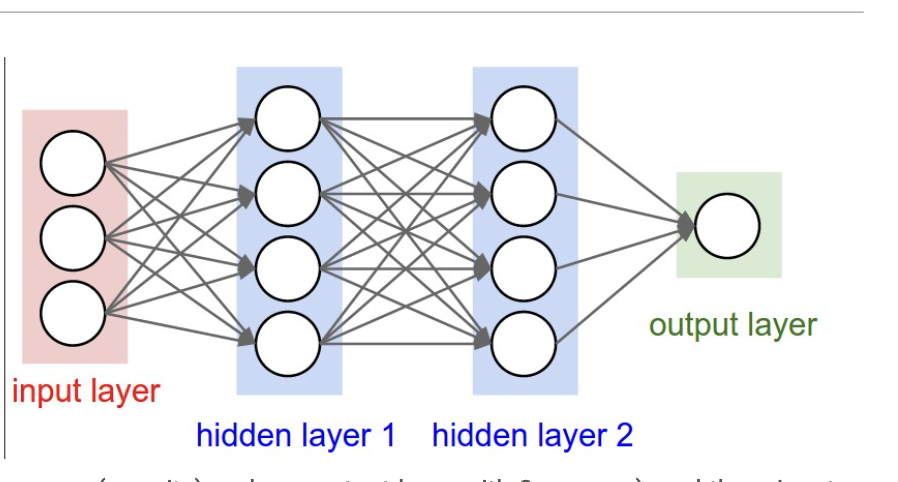

In [ ]:
# forward pass of a 3-layer NN
f = lambda x:1.0/(1.0+exp(-x)) # activation function (sigmoid)
x=np.random.randn(3,1) # random input vector of three numbers (3 * 1)
h1 = f(np.dot(W1,x)+b1) # calculate 1st hidden layer activations (4 * 1)
h2 = f(np.dot(W2,h1)+b2) # calculate 2nd hidden layer activations (4*1)
out=np.dot(W3,h2)+b3 #output neuron (1*1)

# where W1,W2,W3,b1,b2,b3: learnable parameters

## Representational Power of Fully-Connected Neural Networks

- **Universal Approximation Theorem**  
  A feed-forward network with **at least one hidden layer** and a nonlinearity (e.g. sigmoid, ReLU) can approximate **any continuous function** \(f(x)\) on a compact domain to arbitrary precision.  
  Formally:  
  $$
    \forall \,\epsilon > 0,\;\exists\,g(x)=\mathrm{NN}(x)
    \quad\text{s.t.}\quad
    \bigl|f(x) - g(x)\bigr| < \epsilon,\;\forall x.
  $$

- **Why go deeper if one hidden layer suffices?**  
  1. **Theoretical vs. practical**  
     - The classic proof uses “sums of indicator bumps” which are discontinuous and difficult to learn via gradient descent.  
  2. **Hierarchical/compact representations**  
     - Deeper networks build features in stages (e.g. edges→textures→objects), yielding **simpler parameterizations** of smooth functions that match real-world data.  
  3. **Empirical observation**  
     - 3-layer nets often outperform 2-layer nets in practice; moving to 4–6 layers yields diminishing returns for fully-connected architectures.  
     - In contrast, **Convolutional Networks** exploit parameter sharing and data hierarchy (e.g. pixels→edges→parts→objects) and benefit from **10+ layers**.

> **Takeaway:**  
> - **One hidden layer** guarantees theoretical universality.  
> - **Multiple hidden layers** deliver practical advantages: easier optimization, hierarchical feature learning, and efficient parameter use—especially in domains with compositional structure (e.g. images).  

## Choosing Network Size & Parameter Count

- **Capacity vs. Overfitting**  
  - More layers and neurons ⇒ more parameters ⇒ higher capacity to model complex functions.  
  - High capacity can overfit, but **overfitting should be managed by regularization** (e.g. ​L2, dropout, input noise), **not by shrinking the network**.

- **Optimization & Convergence**  
  - **Small networks** (few parameters) have fewer local minima, many of which are **poor** (high loss) ⇒ training results vary wildly with initialization.  
  - **Large networks** (many parameters) have **more** local minima, but **most are good** (low loss) and often **flat** ⇒ training converges reliably to similarly strong solutions.

- **Practical Guideline**  
  1. **Use the largest network** your compute budget allows (maximize parameter count).  
  2. **Control overfitting** with regularization techniques—don’t reduce the number of parameters.  
  3. A bigger model ⇒ **more stable convergence**, **lower variance**, and **better practical performance** so long as you regularize properly.

> **Takeaway:**  
> Use as **many parameters** as you can afford, and **regularize** to prevent overfitting—don’t downsize your network out of fear of overfitting.  